# Exploratory Data Analysis (EDA)

In [135]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib as plt
import seaborn as sns
path="/Users/pgarciaegan/Jupyter_Notebook/Final_project_data.csv"
df = pd.read_csv(path)
df.head(5)

,Groups,ELSQ3,Age,Sex,Race,Education,duration_of_infection,recent_cd4,nadir_cd4,recent_viral_load,...,Norm_Occipitallobe_left,Norm_cingulate_left,Norm_Middlefrontal_right,Norm_Inferiorfrontal_right,Norm_Orbitofrontal_right,Norm_Temporallobe_right,Norm_Frontallobe_right,Norm_Parietallobe_right,Norm_Occipitallobe_right,Norm_Cingulate_right
0,3,1,60,0,8,16,372,634,0,20,...,21838.304038,10071.245147,20422.827167,9300.283497,10507.279443,47302.806295,74989.235024,51510.144519,23411.936062,8789.651947
1,3,1,58,0,8,14,327,508,207,20,...,22413.717987,9549.176014,17403.371160,8597.781740,10884.653515,57816.721406,72864.084379,56801.357063,22008.420971,9495.030850
2,2,0,61,0,7,18,381,967,600,20,...,22291.566581,10917.437428,20042.380979,9548.460174,12072.538946,48927.164997,78606.711681,52197.447529,24577.872377,8983.116683
3,3,1,62,0,8,12,324,566,,20,...,22221.083599,8966.637438,19253.421827,11252.829947,11197.044609,46340.313683,76786.653031,49432.491439,23449.871200,7957.411198
4,3,1,52,1,7,13,,1159,30,20,...,19479.050894,7743.738890,18762.889369,9838.606990,10950.363805,47713.041638,73395.825488,50419.817342,20981.838321,8878.399314


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Columns: 377 entries, Groups to Norm_Cingulate_right
dtypes: float64(163), int64(75), object(139)
memory usage: 848.4+ KB


In [3]:
#replace "missing values" with NaN
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)
df.head(5)

,Groups,ELSQ3,Age,Sex,Race,Education,duration_of_infection,recent_cd4,nadir_cd4,recent_viral_load,...,Norm_Occipitallobe_left,Norm_cingulate_left,Norm_Middlefrontal_right,Norm_Inferiorfrontal_right,Norm_Orbitofrontal_right,Norm_Temporallobe_right,Norm_Frontallobe_right,Norm_Parietallobe_right,Norm_Occipitallobe_right,Norm_Cingulate_right
0,3,1,60,0,8,16,372,634,0,20,...,21838.304038,10071.245147,20422.827167,9300.283497,10507.279443,47302.806295,74989.235024,51510.144519,23411.936062,8789.651947
1,3,1,58,0,8,14,327,508,207,20,...,22413.717987,9549.176014,17403.371160,8597.781740,10884.653515,57816.721406,72864.084379,56801.357063,22008.420971,9495.030850
2,2,0,61,0,7,18,381,967,600,20,...,22291.566581,10917.437428,20042.380979,9548.460174,12072.538946,48927.164997,78606.711681,52197.447529,24577.872377,8983.116683
3,3,1,62,0,8,12,324,566,NaN,20,...,22221.083599,8966.637438,19253.421827,11252.829947,11197.044609,46340.313683,76786.653031,49432.491439,23449.871200,7957.411198
4,3,1,52,1,7,13,NaN,1159,30,20,...,19479.050894,7743.738890,18762.889369,9838.606990,10950.363805,47713.041638,73395.825488,50419.817342,20981.838321,8878.399314


### Detecting missing values

In [4]:
missing_data = df.isnull()
missing_data.head(5)

,Groups,ELSQ3,Age,Sex,Race,Education,duration_of_infection,recent_cd4,nadir_cd4,recent_viral_load,...,Norm_Occipitallobe_left,Norm_cingulate_left,Norm_Middlefrontal_right,Norm_Inferiorfrontal_right,Norm_Orbitofrontal_right,Norm_Temporallobe_right,Norm_Frontallobe_right,Norm_Parietallobe_right,Norm_Occipitallobe_right,Norm_Cingulate_right
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Count missing values in each column

In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Groups
False    288
Name: Groups, dtype: int64

ELSQ3
False    288
Name: ELSQ3, dtype: int64

Age
False    288
Name: Age, dtype: int64

Sex
False    288
Name: Sex, dtype: int64

Race
False    288
Name: Race, dtype: int64

Education
False    288
Name: Education, dtype: int64

duration_of_infection
False    286
True       2
Name: duration_of_infection, dtype: int64

recent_cd4
False    156
True     132
Name: recent_cd4, dtype: int64

nadir_cd4
True     149
False    139
Name: nadir_cd4, dtype: int64

recent_viral_load
False    157
True     131
Name: recent_viral_load, dtype: int64

CPE
False    155
True     133
Name: CPE, dtype: int64

ELSQ_total_nodmesticv
False    288
Name: ELSQ_total_nodmesticv, dtype: int64

alcohol_total_score
False    288
Name: alcohol_total_score, dtype: int64

tobacco_total_score
False    286
True       2
Name: tobacco_total_score, dtype: int64

Cocaine_total
False    282
True       6
Name: Cocaine_total, dtype: int64

Opiates_heroin_total
False    285
True       

Name: lh_frontalpole_thickness, dtype: int64

lh_temporalpole_thickness
False    288
Name: lh_temporalpole_thickness, dtype: int64

lh_transversetemporal_thickness
False    288
Name: lh_transversetemporal_thickness, dtype: int64

lh_insula_thickness
False    288
Name: lh_insula_thickness, dtype: int64

lh_MeanThickness_thickness
False    288
Name: lh_MeanThickness_thickness, dtype: int64

rh_bankssts_thickness
False    288
Name: rh_bankssts_thickness, dtype: int64

rh_caudalanteriorcingulate_thickness
False    288
Name: rh_caudalanteriorcingulate_thickness, dtype: int64

rh_caudalmiddlefrontal_thickness
False    288
Name: rh_caudalmiddlefrontal_thickness, dtype: int64

rh_cuneus_thickness
False    288
Name: rh_cuneus_thickness, dtype: int64

rh_entorhinal_thickness
False    288
Name: rh_entorhinal_thickness, dtype: int64

rh_fusiform_thickness
False    288
Name: rh_fusiform_thickness, dtype: int64

rh_inferiorparietal_thickness
False    288
Name: rh_inferiorparietal_thickness, dtype: i

In [6]:
# summarize the the percentage missing values for each column
for i in df.columns:
    n_miss = df[[i]].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print ('>, '+i+' Missing: %d (%.1f%%)' % (n_miss, perc))


>, Groups Missing: 0 (0.0%)
>, ELSQ3 Missing: 0 (0.0%)
>, Age Missing: 0 (0.0%)
>, Sex Missing: 0 (0.0%)
>, Race Missing: 0 (0.0%)
>, Education Missing: 0 (0.0%)
>, duration_of_infection Missing: 2 (0.7%)
>, recent_cd4 Missing: 132 (45.8%)
>, nadir_cd4 Missing: 149 (51.7%)
>, recent_viral_load Missing: 131 (45.5%)
>, CPE Missing: 133 (46.2%)
>, ELSQ_total_nodmesticv Missing: 0 (0.0%)
>, alcohol_total_score Missing: 0 (0.0%)
>, tobacco_total_score Missing: 2 (0.7%)
>, Cocaine_total Missing: 6 (2.1%)
>, Opiates_heroin_total Missing: 3 (1.0%)
>, alcohol_dep Missing: 0 (0.0%)
>, cocaine_dep Missing: 6 (2.1%)
>, Opiate_dep Missing: 3 (1.0%)
>, cocaine___1 Missing: 29 (10.1%)
>, amphetamine___1 Missing: 29 (10.1%)
>, meth___1 Missing: 29 (10.1%)
>, thc___1 Missing: 29 (10.1%)
>, mtd___1 Missing: 29 (10.1%)
>, opiates___1 Missing: 29 (10.1%)
>, pcp___1 Missing: 29 (10.1%)
>, barbiturates___1 Missing: 29 (10.1%)
>, benzo___1 Missing: 29 (10.1%)
>, tca___1 Missing: 29 (10.1%)
>, hiv_status Miss

>, rh_medialorbitofrontal_thickness Missing: 0 (0.0%)
>, rh_middletemporal_thickness Missing: 0 (0.0%)
>, rh_parahippocampal_thickness Missing: 0 (0.0%)
>, rh_paracentral_thickness Missing: 0 (0.0%)
>, rh_parsopercularis_thickness Missing: 0 (0.0%)
>, rh_parsorbitalis_thickness Missing: 0 (0.0%)
>, rh_parstriangularis_thickness Missing: 0 (0.0%)
>, rh_pericalcarine_thickness Missing: 0 (0.0%)
>, rh_postcentral_thickness Missing: 0 (0.0%)
>, rh_posteriorcingulate_thickness Missing: 0 (0.0%)
>, rh_precentral_thickness Missing: 0 (0.0%)
>, rh_precuneus_thickness Missing: 0 (0.0%)
>, rh_rostralanteriorcingulate_thickness Missing: 0 (0.0%)
>, rh_rostralmiddlefrontal_thickness Missing: 0 (0.0%)
>, rh_superiorfrontal_thickness Missing: 0 (0.0%)
>, rh_superiorparietal_thickness Missing: 0 (0.0%)
>, rh_superiortemporal_thickness Missing: 0 (0.0%)
>, rh_supramarginal_thickness Missing: 0 (0.0%)
>, rh_frontalpole_thickness Missing: 0 (0.0%)
>, rh_temporalpole_thickness Missing: 0 (0.0%)
>, rh_tra

In [7]:
#drop values that have more than 3% missing values
perc_present = df.shape[0] * 97 // 100 
df1=df.dropna(axis=1,thresh=perc_present)
df1 = df1.drop(columns='pid_scandate')

In [8]:
list(df1.columns)

['Groups',
 'ELSQ3',
 'Age',
 'Sex',
 'Race',
 'Education',
 'duration_of_infection',
 'ELSQ_total_nodmesticv',
 'alcohol_total_score',
 'tobacco_total_score',
 'Cocaine_total',
 'Opiates_heroin_total',
 'alcohol_dep',
 'cocaine_dep',
 'Opiate_dep',
 'hiv_status',
 'BDI1',
 'Affective_BDI',
 'Cognitive_BDI',
 'Somatic_BDI',
 'HVLTLearn_Z',
 'HVLTDelay_Z',
 'TrailsA_Z',
 'TrailsB_Z',
 'GPDom_Z',
 'GPNonDom_Z',
 'DS_Z',
 'LNS_Z',
 'Verb_Z',
 'Animals_Z',
 'FAS_Z',
 'Learn_Z',
 'Delay_Z',
 'EF_Z',
 'PM_Z',
 'Lang_Z',
 'Total_Z',
 'orientation',
 '@17_men_6_MONTHS',
 'men_LIFETIME',
 '@18_women_6MONTHS',
 'women_LIFETIME',
 'condom_6MONTHS',
 'condom6M_corrected',
 'condom_LIFETIME',
 'People_6months',
 'People_LiFETIME',
 'lh_bankssts_thickness',
 'lh_caudalanteriorcingulate_thickness',
 'lh_caudalmiddlefrontal_thickness',
 'lh_cuneus_thickness',
 'lh_entorhinal_thickness',
 'lh_fusiform_thickness',
 'lh_inferiorparietal_thickness',
 'lh_inferiortemporal_thickness',
 'lh_isthmuscingulate_

In [9]:
#do data multiple imputation for missing data
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df1)
Xtrans = imp.transform(df1)
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))
type(Xtrans)

Missing: 0


numpy.ndarray

In [10]:
df1 = pd.DataFrame(Xtrans, columns=df1.columns )
df1

,Groups,ELSQ3,Age,Sex,Race,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,tobacco_total_score,...,Norm_Occipitallobe_left,Norm_cingulate_left,Norm_Middlefrontal_right,Norm_Inferiorfrontal_right,Norm_Orbitofrontal_right,Norm_Temporallobe_right,Norm_Frontallobe_right,Norm_Parietallobe_right,Norm_Occipitallobe_right,Norm_Cingulate_right
0,3.0,1.0,60.0,0.0,8.0,16.0,372.000000,3.0,9.0,5.0,...,21838.304038,10071.245147,20422.827167,9300.283497,10507.279443,47302.806295,74989.235024,51510.144519,23411.936062,8789.651947
1,3.0,1.0,58.0,0.0,8.0,14.0,327.000000,6.0,12.0,0.0,...,22413.717987,9549.176014,17403.371160,8597.781740,10884.653515,57816.721406,72864.084379,56801.357063,22008.420971,9495.030850
2,2.0,0.0,61.0,0.0,7.0,18.0,381.000000,1.0,9.0,9.0,...,22291.566581,10917.437428,20042.380979,9548.460174,12072.538946,48927.164997,78606.711681,52197.447529,24577.872377,8983.116683
3,3.0,1.0,62.0,0.0,8.0,12.0,324.000000,3.0,9.0,13.0,...,22221.083599,8966.637438,19253.421827,11252.829947,11197.044609,46340.313683,76786.653031,49432.491439,23449.871200,7957.411198
4,3.0,1.0,52.0,1.0,7.0,13.0,103.433073,5.0,9.0,12.0,...,19479.050894,7743.738890,18762.889369,9838.606990,10950.363805,47713.041638,73395.825488,50419.817342,20981.838321,8878.399314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.0,0.0,55.0,0.0,7.0,15.0,0.000000,1.0,8.0,0.0,...,18873.117160,9871.419975,19666.205239,9052.859946,11247.044108,46899.036328,75883.005023,49273.939312,18988.607317,10477.241119
284,1.0,1.0,54.0,1.0,7.0,12.0,0.000000,3.0,0.0,0.0,...,22209.769637,9213.218095,20473.387308,9935.033223,10455.500274,53685.332899,77748.603002,57625.436224,22588.819826,9207.212078
285,0.0,0.0,51.0,0.0,7.0,12.0,0.000000,0.0,6.0,11.0,...,20689.018108,10019.213047,18707.793443,11597.633426,10358.683253,53391.341594,76568.903076,51361.452766,20603.513099,10679.906810
286,0.0,0.0,58.0,0.0,7.0,12.0,0.000000,0.0,0.0,6.0,...,18859.031152,7806.000062,16626.293638,9526.333803,9411.343724,43412.043907,68246.145521,44533.962848,18680.630174,7373.870814


In [179]:
# Dummy code categorical variables with more than 2 categories
df2 = pd.get_dummies(df1,columns=['Groups', 'Race'])
df2.head()

,ELSQ3,Age,Sex,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,tobacco_total_score,Cocaine_total,Opiates_heroin_total,...,Norm_Cingulate_right,Groups_0.0,Groups_1.0,Groups_2.0,Groups_3.0,Race_1.0,Race_2.0,Race_4.0,Race_7.0,Race_8.0
0,1.0,60.0,0.0,16.0,372.000000,3.0,9.0,5.0,0.0,0.0,...,8789.651947,0,0,0,1,0,0,0,0,1
1,1.0,58.0,0.0,14.0,327.000000,6.0,12.0,0.0,0.0,0.0,...,9495.030850,0,0,0,1,0,0,0,0,1
2,0.0,61.0,0.0,18.0,381.000000,1.0,9.0,9.0,0.0,0.0,...,8983.116683,0,0,1,0,0,0,0,1,0
3,1.0,62.0,0.0,12.0,324.000000,3.0,9.0,13.0,3.0,0.0,...,7957.411198,0,0,0,1,0,0,0,0,1
4,1.0,52.0,1.0,13.0,103.433073,5.0,9.0,12.0,16.0,0.0,...,8878.399314,0,0,0,1,0,0,0,1,0


In [180]:
#create a loop for continous variables to detect non-normal distributed variables and assing to a subdataset
non_normal = []

for c in df2.columns:
    normality_df = pg.normality(df2[c], method='normaltest')
    if ( normality_df.loc[c,'normal'] == False ) : 
            non_normal.append(c)

print (non_normal)
        
#pg.normality(df['Age'], method='normaltest')

['ELSQ3', 'Age', 'Sex', 'duration_of_infection', 'ELSQ_total_nodmesticv', 'alcohol_total_score', 'tobacco_total_score', 'Cocaine_total', 'Opiates_heroin_total', 'alcohol_dep', 'cocaine_dep', 'Opiate_dep', 'hiv_status', 'BDI1', 'Affective_BDI', 'Cognitive_BDI', 'Somatic_BDI', 'GPDom_Z', 'DS_Z', 'Verb_Z', 'Animals_Z', 'Delay_Z', 'orientation', '@17_men_6_MONTHS', 'men_LIFETIME', '@18_women_6MONTHS', 'women_LIFETIME', 'condom_6MONTHS', 'condom6M_corrected', 'condom_LIFETIME', 'People_6months', 'People_LiFETIME', 'lh_isthmuscingulate_thickness', 'lh_middletemporal_thickness', 'lh_pericalcarine_thickness', 'lh_posteriorcingulate_thickness', 'lh_precentral_thickness', 'lh_frontalpole_thickness', 'rh_entorhinal_thickness', 'rh_parstriangularis_thickness', 'rh_pericalcarine_thickness', 'rh_posteriorcingulate_thickness', 'rh_precentral_thickness', 'rh_temporalpole_thickness', 'rh_insula_thickness', 'People_6m_2more', 'People_6m_4more', 'MAH_Vol_original', 'MAH_RAB_3', 'rhCorticalWhiteMatterVol'

In [181]:
len(non_normal)

126

In [182]:
#remove outliers
from scipy import stats
df3=df2[(np.abs(stats.zscore(df2)) < 3).all(axis=1)]

In [183]:
df3
# removing outliers reduces the data by much so not going to get rid of outliers

,ELSQ3,Age,Sex,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,tobacco_total_score,Cocaine_total,Opiates_heroin_total,...,Norm_Cingulate_right,Groups_0.0,Groups_1.0,Groups_2.0,Groups_3.0,Race_1.0,Race_2.0,Race_4.0,Race_7.0,Race_8.0
0,1.0,60.0,0.0,16.0,372.0,3.0,9.0,5.0,0.0,0.0,...,8789.651947,0,0,0,1,0,0,0,0,1
1,1.0,58.0,0.0,14.0,327.0,6.0,12.0,0.0,0.0,0.0,...,9495.030850,0,0,0,1,0,0,0,0,1
2,0.0,61.0,0.0,18.0,381.0,1.0,9.0,9.0,0.0,0.0,...,8983.116683,0,0,1,0,0,0,0,1,0
3,1.0,62.0,0.0,12.0,324.0,3.0,9.0,13.0,3.0,0.0,...,7957.411198,0,0,0,1,0,0,0,0,1
6,1.0,58.0,1.0,11.0,312.0,10.0,11.0,0.0,0.0,0.0,...,8347.880001,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.0,55.0,0.0,15.0,0.0,1.0,8.0,0.0,0.0,0.0,...,10477.241119,1,0,0,0,0,0,0,1,0
284,1.0,54.0,1.0,12.0,0.0,3.0,0.0,0.0,0.0,0.0,...,9207.212078,0,1,0,0,0,0,0,1,0
285,0.0,51.0,0.0,12.0,0.0,0.0,6.0,11.0,0.0,0.0,...,10679.906810,1,0,0,0,0,0,0,1,0
286,0.0,58.0,0.0,12.0,0.0,0.0,0.0,6.0,0.0,0.0,...,7373.870814,1,0,0,0,0,0,0,1,0


In [186]:
statistics = df2.describe()
statistics

,ELSQ3,Age,Sex,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,tobacco_total_score,Cocaine_total,Opiates_heroin_total,...,Norm_Cingulate_right,Groups_0.0,Groups_1.0,Groups_2.0,Groups_3.0,Race_1.0,Race_2.0,Race_4.0,Race_7.0,Race_8.0
count,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,...,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000,288.000000
mean,0.569444,43.277778,0.368056,13.559028,96.451588,3.430556,6.638889,5.483798,1.636157,0.226606,...,9361.399306,0.246528,0.208333,0.184028,0.361111,0.006944,0.003472,0.006944,0.593750,0.388889
std,0.496016,17.502591,0.483116,2.369225,121.596796,2.707977,3.890686,5.014874,3.800106,1.345741,...,1121.255921,0.431740,0.406823,0.388181,0.481159,0.083188,0.058926,0.083188,0.491987,0.488347
min,0.000000,18.000000,0.000000,8.000000,-39.375760,0.000000,0.000000,0.000000,-1.229295,0.000000,...,6113.219424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,23.750000,0.000000,12.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,...,8564.794045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,48.000000,0.000000,13.000000,21.500000,3.000000,8.000000,6.000000,0.000000,0.000000,...,9279.919893,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,57.000000,1.000000,16.000000,192.000000,5.000000,10.000000,11.000000,0.513515,0.000000,...,10052.165243,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,89.000000,1.000000,20.000000,468.000000,13.000000,13.000000,13.000000,16.000000,13.000000,...,12423.498585,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
# separate continouos variables from categorical variables coded 1 or 0
from scipy.stats import zscore
z_score = []
others = []

for c in df2.columns:
    if (statistics.loc['min',c] == 0.0 ) & (statistics.loc['max',c] == 1.0): 
        others.append(c)     
    else:   
        z_score.append(c)
        
print (len(z_score))   
print (len(others))


240
29


In [199]:
# Zscore the continous variables 
from scipy.stats import zscore

df_zscored = pd.DataFrame()

for c in z_score:
    df_zscored[c] = zscore(df2[c])
df_zscored


,Age,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,tobacco_total_score,Cocaine_total,Opiates_heroin_total,cocaine_dep,BDI1,...,Norm_Occipitallobe_left,Norm_cingulate_left,Norm_Middlefrontal_right,Norm_Inferiorfrontal_right,Norm_Orbitofrontal_right,Norm_Temporallobe_right,Norm_Frontallobe_right,Norm_Parietallobe_right,Norm_Occipitallobe_right,Norm_Cingulate_right
0,0.957077,1.032076,2.270027,-0.159272,0.607919,-0.096641,-0.431305,-0.16868,-0.311671,1.444219,...,0.097902,0.070240,0.114083,-0.620225,-0.618646,-0.728998,-0.526067,-0.459719,0.417451,-0.510804
1,0.842609,0.186449,1.899308,0.950494,1.380333,-1.095410,-0.431305,-0.16868,-0.311671,1.674185,...,0.335911,-0.364664,-1.249773,-1.184408,-0.278724,1.434233,-0.818237,0.566441,-0.145249,0.119388
2,1.014311,1.877703,2.344171,-0.899116,0.607919,0.702375,-0.431305,-0.16868,-0.311671,-0.855437,...,0.285385,0.775152,-0.057760,-0.420913,0.791271,-0.394787,-0.028728,-0.326426,0.884900,-0.337961
3,1.071545,-0.659178,1.874593,-0.159272,0.607919,1.501391,0.359521,-0.16868,-0.311671,-0.855437,...,0.256231,-0.849941,-0.414125,0.947877,0.002664,-0.927030,-0.278953,-0.862653,0.432660,-1.254336
4,0.499206,-0.236365,0.057515,0.580572,0.607919,1.301637,3.786433,-0.16868,3.240195,-0.855437,...,-0.877958,-1.868664,-0.635693,-0.187894,-0.219535,-0.644592,-0.745132,-0.671174,-0.556828,-0.431517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.670908,0.609263,-0.794589,-0.899116,0.350447,-1.095410,-0.431305,-0.16868,-0.311671,-0.165540,...,-1.128591,-0.096222,-0.227675,-0.818932,0.047702,-0.812073,-0.403189,-0.893402,-1.355958,0.996904
284,0.613674,-0.659178,-0.794589,-0.159272,-1.709325,-1.095410,-0.431305,-0.16868,-0.311671,-0.855437,...,0.251552,-0.644530,0.136921,-0.110453,-0.665286,0.584203,-0.146702,0.726261,0.087446,-0.137752
285,0.441973,-0.659178,-0.794589,-1.269038,-0.164496,1.101883,-0.431305,-0.16868,-0.311671,-0.855437,...,-0.377478,0.026895,-0.660579,1.224791,-0.752495,0.523714,-0.308890,-0.488556,-0.708507,1.177967
286,0.842609,-0.659178,-0.794589,-1.269038,-1.709325,0.103113,-0.431305,-0.16868,-0.311671,-0.855437,...,-1.134417,-1.816798,-1.600771,-0.438682,-1.605817,-1.529519,-1.453122,-1.812657,-1.479433,-1.775677


In [202]:
# add the categorical features that didn't get zscored
for c in others:
    df_zscored[c] = df2[c]
df_zscored

,Age,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,tobacco_total_score,Cocaine_total,Opiates_heroin_total,cocaine_dep,BDI1,...,Interpersonal_2,Groups_0.0,Groups_1.0,Groups_2.0,Groups_3.0,Race_1.0,Race_2.0,Race_4.0,Race_7.0,Race_8.0
0,0.957077,1.032076,2.270027,-0.159272,0.607919,-0.096641,-0.431305,-0.16868,-0.311671,1.444219,...,0.0,0,0,0,1,0,0,0,0,1
1,0.842609,0.186449,1.899308,0.950494,1.380333,-1.095410,-0.431305,-0.16868,-0.311671,1.674185,...,1.0,0,0,0,1,0,0,0,0,1
2,1.014311,1.877703,2.344171,-0.899116,0.607919,0.702375,-0.431305,-0.16868,-0.311671,-0.855437,...,0.0,0,0,1,0,0,0,0,1,0
3,1.071545,-0.659178,1.874593,-0.159272,0.607919,1.501391,0.359521,-0.16868,-0.311671,-0.855437,...,1.0,0,0,0,1,0,0,0,0,1
4,0.499206,-0.236365,0.057515,0.580572,0.607919,1.301637,3.786433,-0.16868,3.240195,-0.855437,...,1.0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.670908,0.609263,-0.794589,-0.899116,0.350447,-1.095410,-0.431305,-0.16868,-0.311671,-0.165540,...,0.0,1,0,0,0,0,0,0,1,0
284,0.613674,-0.659178,-0.794589,-0.159272,-1.709325,-1.095410,-0.431305,-0.16868,-0.311671,-0.855437,...,0.0,0,1,0,0,0,0,0,1,0
285,0.441973,-0.659178,-0.794589,-1.269038,-0.164496,1.101883,-0.431305,-0.16868,-0.311671,-0.855437,...,0.0,1,0,0,0,0,0,0,1,0
286,0.842609,-0.659178,-0.794589,-1.269038,-1.709325,0.103113,-0.431305,-0.16868,-0.311671,-0.855437,...,0.0,1,0,0,0,0,0,0,1,0


In [218]:
pg.corr(df_zscored['ELSQ_total_nodmesticv'], df_zscored['Norm_CortexVol'], method="spearman").round(3)

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,288,0.018,"[-0.1, 0.13]",0.0,-0.007,0.759,0.061


In [238]:
# Describe relationship of features to the target
correlation_list=[]
for z in z_score: 
    correlation = pg.corr(df_zscored['ELSQ_total_nodmesticv'], df_zscored[z], method="spearman").round(3)
    if (correlation.loc['spearman','p-val'] <= 0.050 ) :
          correlation_list.append(z)
print(correlation_list)

df_to_corrolate = df_zscored.loc[:, correlation_list]
df_to_corrolate


['Education', 'duration_of_infection', 'ELSQ_total_nodmesticv', 'alcohol_total_score', 'BDI1', 'Affective_BDI', 'Cognitive_BDI', 'Somatic_BDI', 'DS_Z', 'orientation', '@17_men_6_MONTHS', 'men_LIFETIME', 'condom6M_corrected', 'People_6months', 'People_LiFETIME', 'lh_entorhinal_thickness', 'lh_pericalcarine_thickness', 'lh_rostralmiddlefrontal_thickness', 'lh_transversetemporal_thickness', 'rh_lateralorbitofrontal_thickness', 'rh_parsorbitalis_thickness', 'Abuse', 'fam_dysfunction', 'Interpersonal', 'Interpersonal_B', 'Groups_abuse']


,Education,duration_of_infection,ELSQ_total_nodmesticv,alcohol_total_score,BDI1,Affective_BDI,Cognitive_BDI,Somatic_BDI,DS_Z,orientation,...,lh_pericalcarine_thickness,lh_rostralmiddlefrontal_thickness,lh_transversetemporal_thickness,rh_lateralorbitofrontal_thickness,rh_parsorbitalis_thickness,Abuse,fam_dysfunction,Interpersonal,Interpersonal_B,Groups_abuse
0,1.032076,2.270027,-0.159272,0.607919,1.444219,0.822694,1.620737,-0.297848,0.860038,0.663431,...,-0.826912,0.134498,-0.789607,-0.011881,-1.788366,-0.660628,-1.048172,-0.657667,0.039840,0.454257
1,0.186449,1.899308,0.950494,1.380333,1.674185,1.897233,1.279449,1.670943,1.500498,0.663431,...,-0.324574,0.318117,-0.174208,-0.088695,0.338224,2.582454,-0.058423,2.183455,2.334606,1.292885
2,1.877703,2.344171,-0.899116,0.607919,-0.855437,-0.789115,-0.768278,-1.141616,-0.420881,2.089314,...,-0.543904,-2.100859,-0.332332,-1.764638,-2.537989,-0.660628,-1.048172,-0.657667,-0.725082,0.454257
3,-0.659178,1.874593,-0.159272,0.607919,-0.855437,-0.789115,-0.768278,-1.141616,1.500498,0.663431,...,0.029185,0.541653,1.039493,0.581682,0.960251,0.420400,-1.048172,0.289374,0.039840,1.292885
4,-0.236365,0.057515,0.580572,0.607919,-0.855437,-0.789115,-0.768278,-1.141616,0.219579,-0.762451,...,-1.378776,-0.927296,-1.071664,0.958770,0.933669,0.420400,0.931326,0.289374,0.804762,1.292885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.609263,-0.794589,-0.899116,0.350447,-0.165540,-0.251845,-0.085702,-0.297848,0.860038,-0.762451,...,-1.046242,-1.981107,-0.930635,-0.814937,-1.097224,-0.660628,-1.048172,-0.657667,-0.725082,-1.222999
284,-0.659178,-0.794589,-0.159272,-1.709325,-0.855437,-0.789115,-0.768278,-1.141616,-0.100651,-0.762451,...,1.564499,0.381984,0.137764,-1.275822,-0.209373,-0.660628,-0.058423,-0.657667,-0.725082,-1.222999
285,-0.659178,-0.794589,-1.269038,-0.164496,-0.855437,-0.789115,-0.768278,-1.141616,-0.100651,-0.762451,...,-1.201896,0.310134,-0.665672,-0.493715,-1.825581,-0.660628,-1.048172,-0.657667,-0.725082,-1.222999
286,-0.659178,-0.794589,-1.269038,-1.709325,-0.855437,-0.789115,-0.768278,-1.141616,0.539809,-0.762451,...,-2.043842,-1.158815,-0.558832,-2.043962,-0.049879,-0.660628,-1.048172,-0.657667,-0.725082,-1.222999


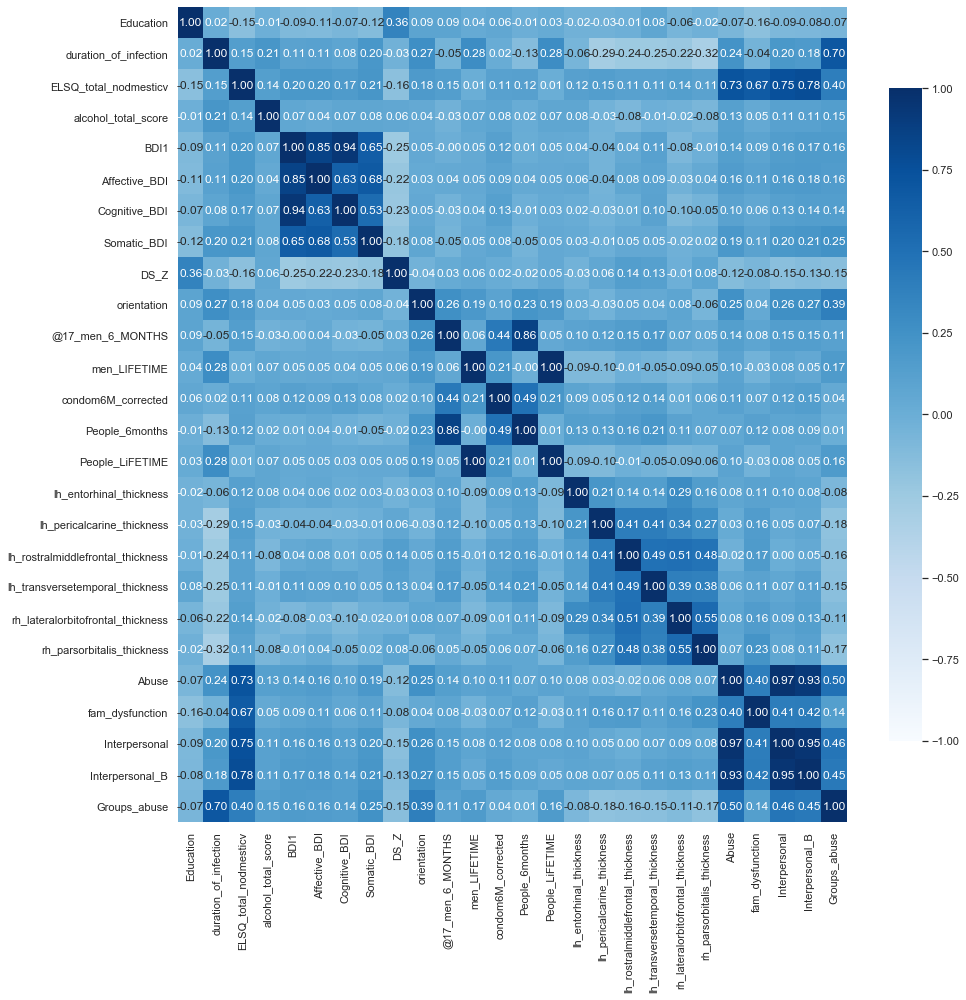

In [242]:
#Heat Map of significant correlations
df_corr = df_to_corrolate.corr()
fig, ax = plt.pyplot.subplots(figsize=(15, 15))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='Blues',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.pyplot.yticks(rotation=0)
plt.pyplot.show()


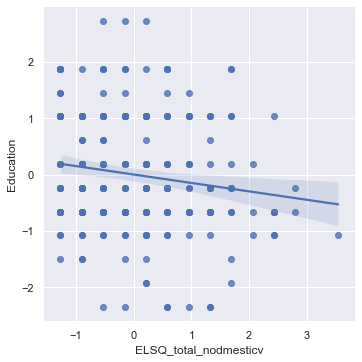

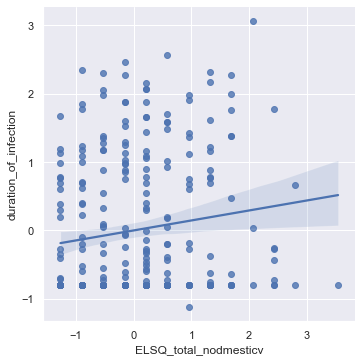

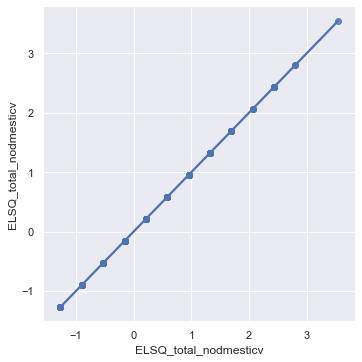

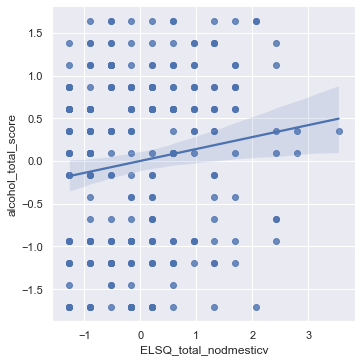

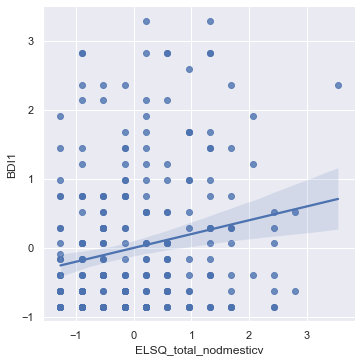

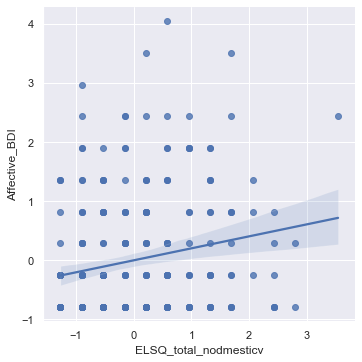

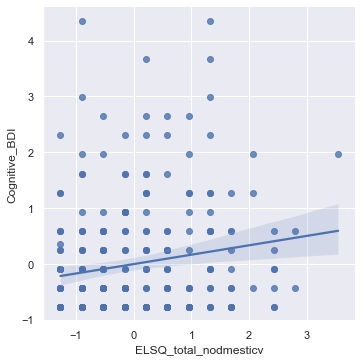

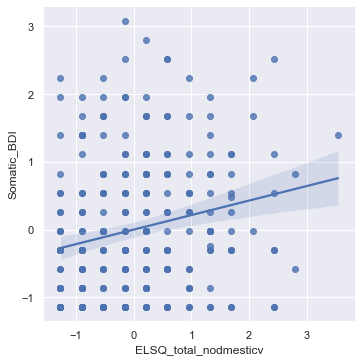

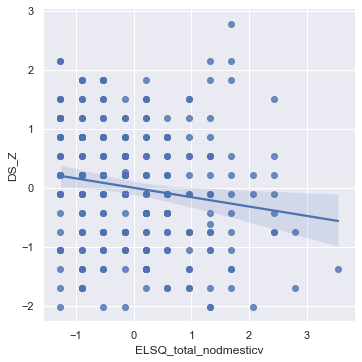

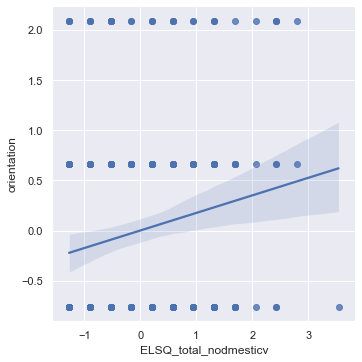

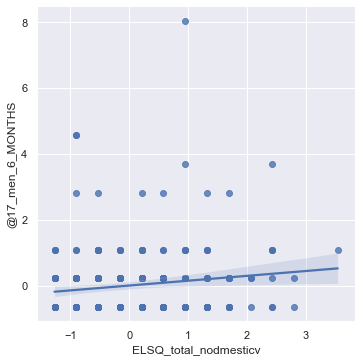

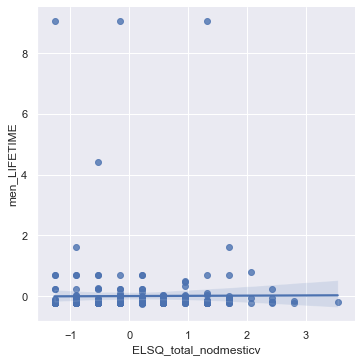

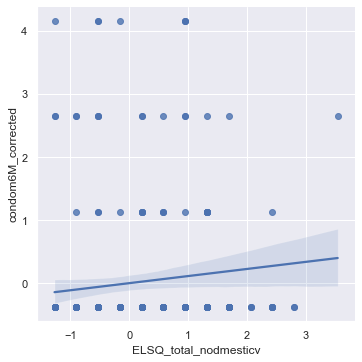

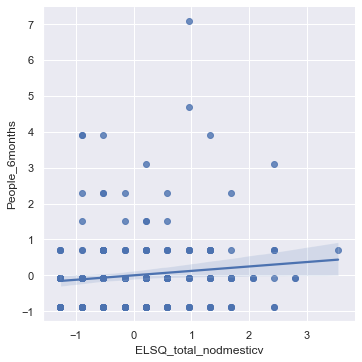

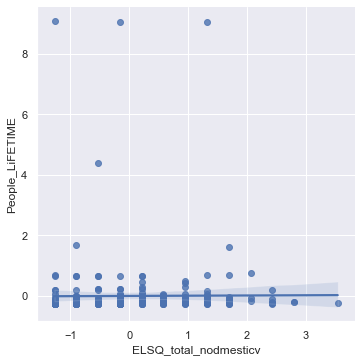

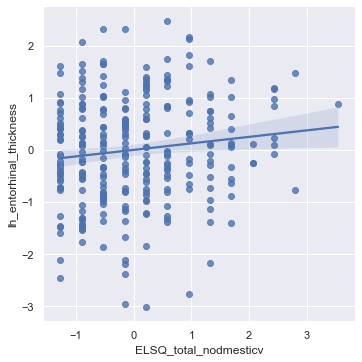

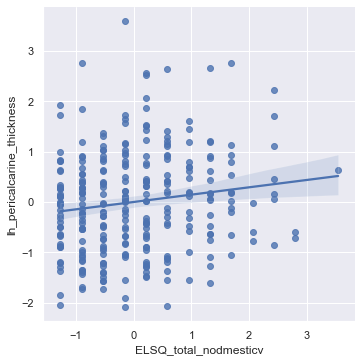

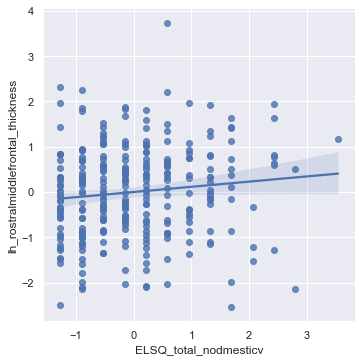

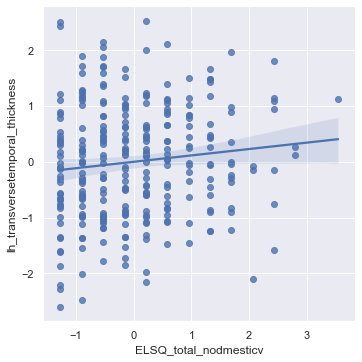

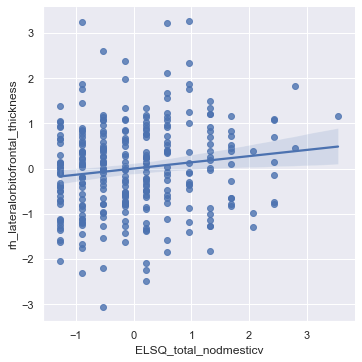

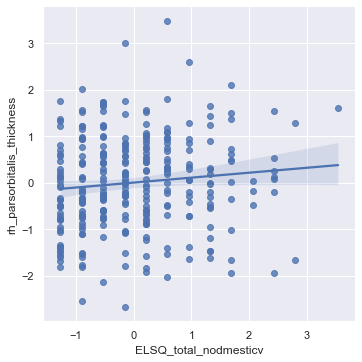

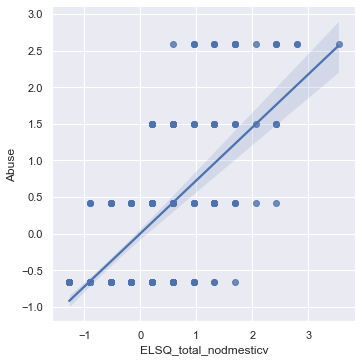

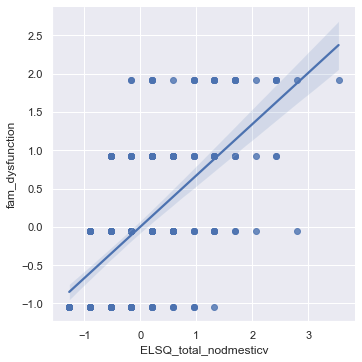

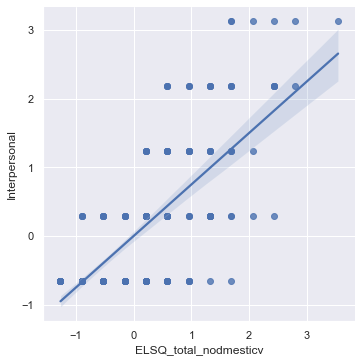

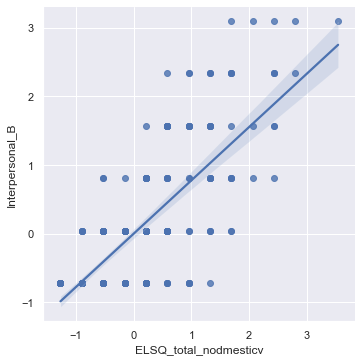

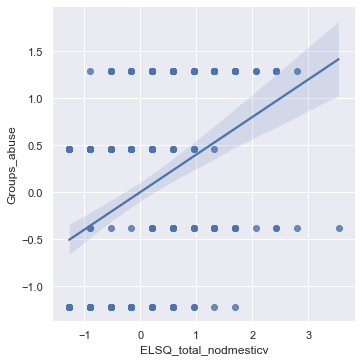

In [243]:
# Examine the associations 
sns.set_theme()
for z in df_to_corrolate: 
    sns.lmplot(x="ELSQ_total_nodmesticv", y=z, data=df_zscored)
    plt.pyplot.show()

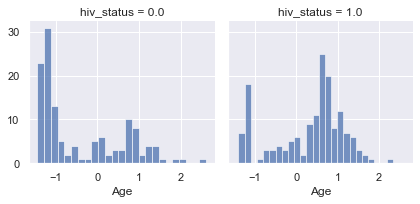

In [210]:
g = sns.FacetGrid(df_zscored, col = "hiv_status")
g.map(sns.histplot, "Age", bins = 25)
plt.pyplot.show()

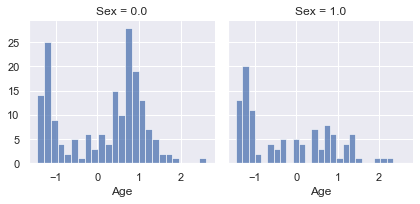

In [214]:
g = sns.FacetGrid(df_zscored, col = "Sex")
g.map(sns.histplot, "Age", bins = 25)
plt.pyplot.show()
    

In [245]:
df_zscored.to_csv('/Users/pgarciaegan/Jupyter_Notebook/Final_project_data_clean.csv')